# Movie Recommedation system


## Business Understanding

### a) Introduction

A movie recommendation aims to anticipate or filter preferences in line with the user's  movie selections.it predicts the ratings for movies users haven’t watched yet. Movies are then indexed and suggested to users based on these predicted ratings.The Stakeholders is Netflix Company which is a a streaming service that provides thousands of internet-connected devices with access to a large selection of award-winning TV series, films, animation, documentaries, and more.

Netflix's mission is to entertain the world, demonstrating its dedication to producing high-quality video content and providing world-class entertainment services for users.Netflix vision statement is becoming the best global entertainment distribution service and this can be achieved by user retention and engagement on the streaming platform by offering users individualized movie suggestions.This will be achieved by creating a recommender system.

<br> 
The users are classified into 3 groups:

- New users are those who have just joined the site and have never interacted before.
- Users that periodically watch movies but haven't developed firm tastes are referred to as casual users.
- Users that often view movies and have clear preferences for genres are known as enthusiast users.
<br>

We will use a hybrid approach that combines content-based and collaborative filtering methods to provide diverse recommendations.

### b) Problem statement

inaccurate recommedations given to users by different platforms,thus users are forced to take more time in searching for other similar movies which will fit their tastes and prefrences.

### c) Defining Metrics of Success

### d) Research Questions

### e) Main Objective

### f) Specific Objectives

## 2.Data Understanding

We will be using the MovieLens dataset for this purpose. It has been collected by the GroupLens Research Project at the University of Minnesota. MovieLens 100K dataset can be downloaded from http://grouplens.org/datasets/movielens/100k/. It consists of:

- 100,000 ratings (1-5) from 943 users on 1682 movies.
- Each user has rated at least 20 movies.
- Simple demographic info for the users (age, gender, occupation, zip)
- Genre information of movies

## 3.Importing the Necessary Libraries

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 4.Reading The Data


### a) Loading data on movies csv

In [127]:
movies = pd.read_csv("movies.csv",index_col='movieId')#Setting the movieId column as the index column 
#previewing the first 5 rows
movies.head(5)

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [128]:
movies.shape

(9742, 2)

The movie dataframe has rows and 2 columns because the first column was set as the index column.

In [129]:
#description of the data in the DataFrame
movies.describe()

,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [130]:
#overeview of the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB


In [131]:
#Dropping the unnecessary columns which in this case is the genre column
movies_new = movies[['title']]
movies_new

,title
movieId,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)
...,...
193581,Black Butler: Book of the Atlantic (2017)
193583,No Game No Life: Zero (2017)
193585,Flint (2017)


### b) Loading the data on ratings

In [132]:
ratings = pd.read_csv("ratings.csv")#Setting the userId column as the index column 
ratings.head(10)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [133]:
ratings.shape

(100836, 4)

The dataset has 100836 rows and 3 columns 

In [134]:
#creating a new datframe with the needed columns
ratings_new=ratings[['userId','movieId','rating']]
ratings_new.head(5)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [135]:
#Overview of the datset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [136]:
#Description of the datset
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### c) Merging the two dataframes

In [137]:
merged_df = pd.merge(movies_new, ratings_new, on='movieId')
merged_df.head(10)

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
5,1,Toy Story (1995),18,3.5
6,1,Toy Story (1995),19,4.0
7,1,Toy Story (1995),21,3.5
8,1,Toy Story (1995),27,3.0
9,1,Toy Story (1995),31,5.0


In [138]:
#Checking the shape of the datframe
merged_df.shape

(100836, 4)

In [139]:
#Description of the dataframe
merged_df.describe()

,movieId,userId,rating
count,100836.000000,100836.000000,100836.000000
mean,19435.295718,326.127564,3.501557
std,35530.987199,182.618491,1.042529
min,1.000000,1.000000,0.500000
25%,1199.000000,177.000000,3.000000
50%,2991.000000,325.000000,3.500000
75%,8122.000000,477.000000,4.000000
max,193609.000000,610.000000,5.000000


The merged dataframe has 100836 rows and 3 columns

## 5 Data Wrangling

### a) Handling Missing Values

In [140]:
# sum of missing data per column
merged_df.isna().sum()

movieId    0
title      0
userId     0
rating     0
dtype: int64

The dataframe has no missing values.

### b) Handling duplicated values

In [141]:
#checking for the sum of duplicated values
merged_df.duplicated().sum()

0

In [142]:
#exploring the duplicated values
duplicate_rows = merged_df[merged_df.duplicated()]
sample_of_duplicates = duplicate_rows

sample_of_duplicates

,movieId,title,userId,rating


The duplicated values are occurring due to the different or same movies being given the same rating by different users and also the same movies being rated by different users.so we cannot drop the duplicated values because they are true values

### c) Checking for outliers
Outliers are observations that lie an abnormal distance from other values.

In [143]:
#checking for outliers using IQR (Interquartile Range) Method:
# Calculate the IQR
Q1 = merged_df['rating'].quantile(0.25)
Q3 = merged_df['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = merged_df[(merged_df['rating'] < lower_bound) | (merged_df['rating'] > upper_bound)]

outliers

,movieId,title,userId,rating
26,1,Toy Story (1995),76,0.5
239,2,Jumanji (1995),149,1.0
261,2,Jumanji (1995),298,0.5
345,3,Grumpier Old Men (1995),217,1.0
352,3,Grumpier Old Men (1995),294,1.0
...,...,...,...,...
100793,187593,Deadpool 2 (2018),338,1.0
100816,189547,Iron Soldier (2010),210,1.0
100821,190213,John From (2015),338,1.0
100823,190219,Bunny (1998),338,1.0


In [144]:
#Removing the outlies
merged_df = merged_df[(merged_df["rating"] >= lower_bound) & (merged_df["rating"] <= upper_bound)]


In [145]:
#new shape after removing outliers
merged_df.shape

(96655, 4)

In [146]:
merged_df.dtypes

movieId      int64
title       object
userId       int64
rating     float64
dtype: object

## 6. Exploratory Data Analysis

### a) Distribution of data in the rating column

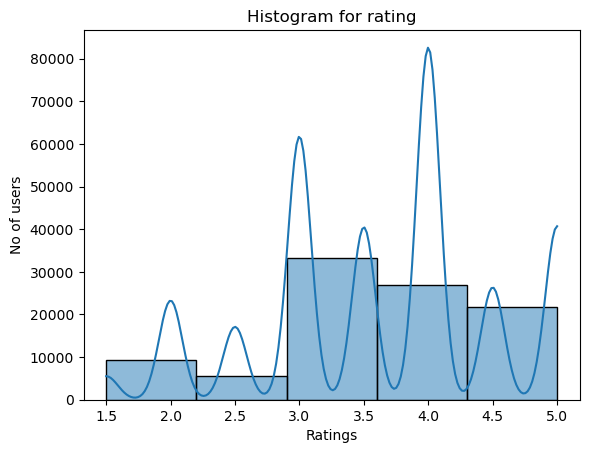

In [147]:
# Choose the column for which you want to create a histogram
column_name = 'rating'

# Extract the data from the selected column
column_data = merged_df[column_name]

# Create a histogram
sns.histplot(column_data, bins=5, kde=True)  # kde=True adds the distribution curve

# Add labels and a title
plt.xlabel('Ratings')
plt.ylabel('No of users')
plt.title('Histogram for {}'.format(column_name))

# Show the histogram

plt.show()

# 7.Modelling

### a) splitting the data using Train-Test split

In [148]:
# Splitting the  data into training and testing sets
train_data, test_data = train_test_split(merged_df, test_size=0.2, random_state=42)

### b)User-based Collaborative Filtering Model

In [158]:
from surprise import SVD
from surprise import accuracy

# Create and train the model
model = SVD()
model.fit(train_data)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model's performance (optional)
rmse = accuracy.rmse(predictions)  # Root Mean Squared Error
mae = accuracy.mae(predictions)      # Mean Absolute Error


ModuleNotFoundError: No module named 'surprise'

In [152]:
# Create a user-item matrix
user_item_matrix = train_data.pivot_table(index='userId', columns='title', values='rating')
# Fill missing values with 0 (indicating no interaction)
user_item_matrix = user_item_matrix.fillna(0)

In [150]:
# Calculate user similarity

user_similarity = cosine_similarity(user_item_matrix.fillna(0))

In [156]:
# Calculate item-item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)
# Convert item similarity into a DataFrame for easier indexing
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
